In [2]:
%load_ext autoreload
%autoreload 2

In [20]:
import os
os.chdir('../')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tcav
from src.plots import plot_tsne, plot_pca
from src.concept_vectors import *

In [22]:
concepts = ["soccer","alga"]
bottlenecks = ["mixed4c"]
concept_vectors = {}
concept_metadata = {}

for i in concepts:    
    concept_data = load_tcav_vectors(i,bottlenecks)
    concept_vectors[i], concept_metadata[i] = concept_data[0], concept_data[1]

In [23]:
all_vectors = []
all_colors = []
all_labels = []

color_list = ['red','black','blue']
label_to_color = {}

for i in concepts:
    for j in range(len(concept_vectors[i])):
        all_vectors.append(concept_vectors[i][j])
        all_labels.append(i)
        if i not in label_to_color:
            label_to_color[i] = color_list[len(label_to_color)]
        all_colors.append(label_to_color[i])
all_vectors = np.array(all_vectors)

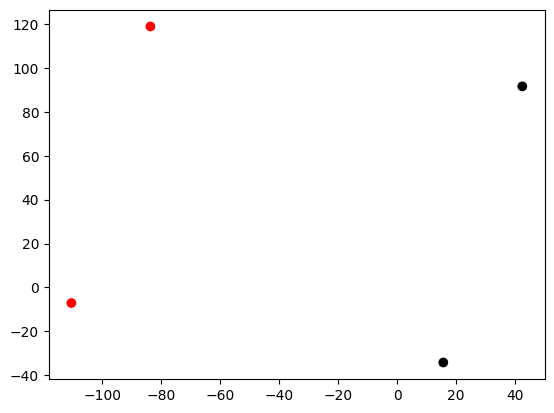

In [24]:
plot_tsne(all_vectors,all_colors)

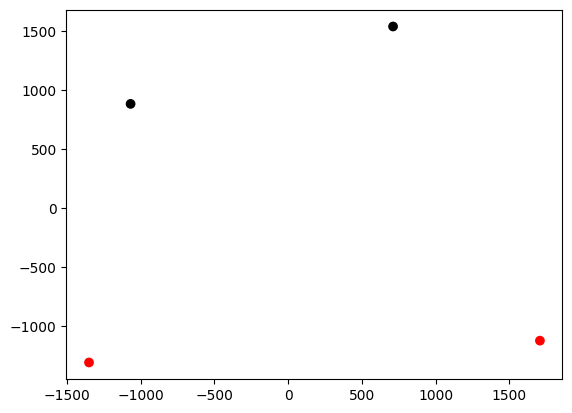

In [26]:
plot_pca(all_vectors,all_colors)